In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
plt.style.use('ggplot')

In [3]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
traindata = datasets.FashionMNIST("FashionMNIST/",train=True,download=True,transform=transforms)
trainloader = torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)
testdata = datasets.FashionMNIST("FashionMNIST/",train=False,download=True,transform=transforms)
testloader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

In [4]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(),lr=0.003)

In [5]:
epochs = 1000
error = []
running_loss = 0
for i in range(1,epochs+1):
    
    optimizer.zero_grad()
    
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0],-1)
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i%100==0:
        error.append(loss.item())
        if i%1000==0:
            print("After {} episode, Loss: {}".format(i,loss.item()))
            print("===============================================")

After 1000 episode, Loss: 0.2973772883415222


In [6]:
error = np.array(error)
num_episodes = np.linspace(0,epochs,len(error))

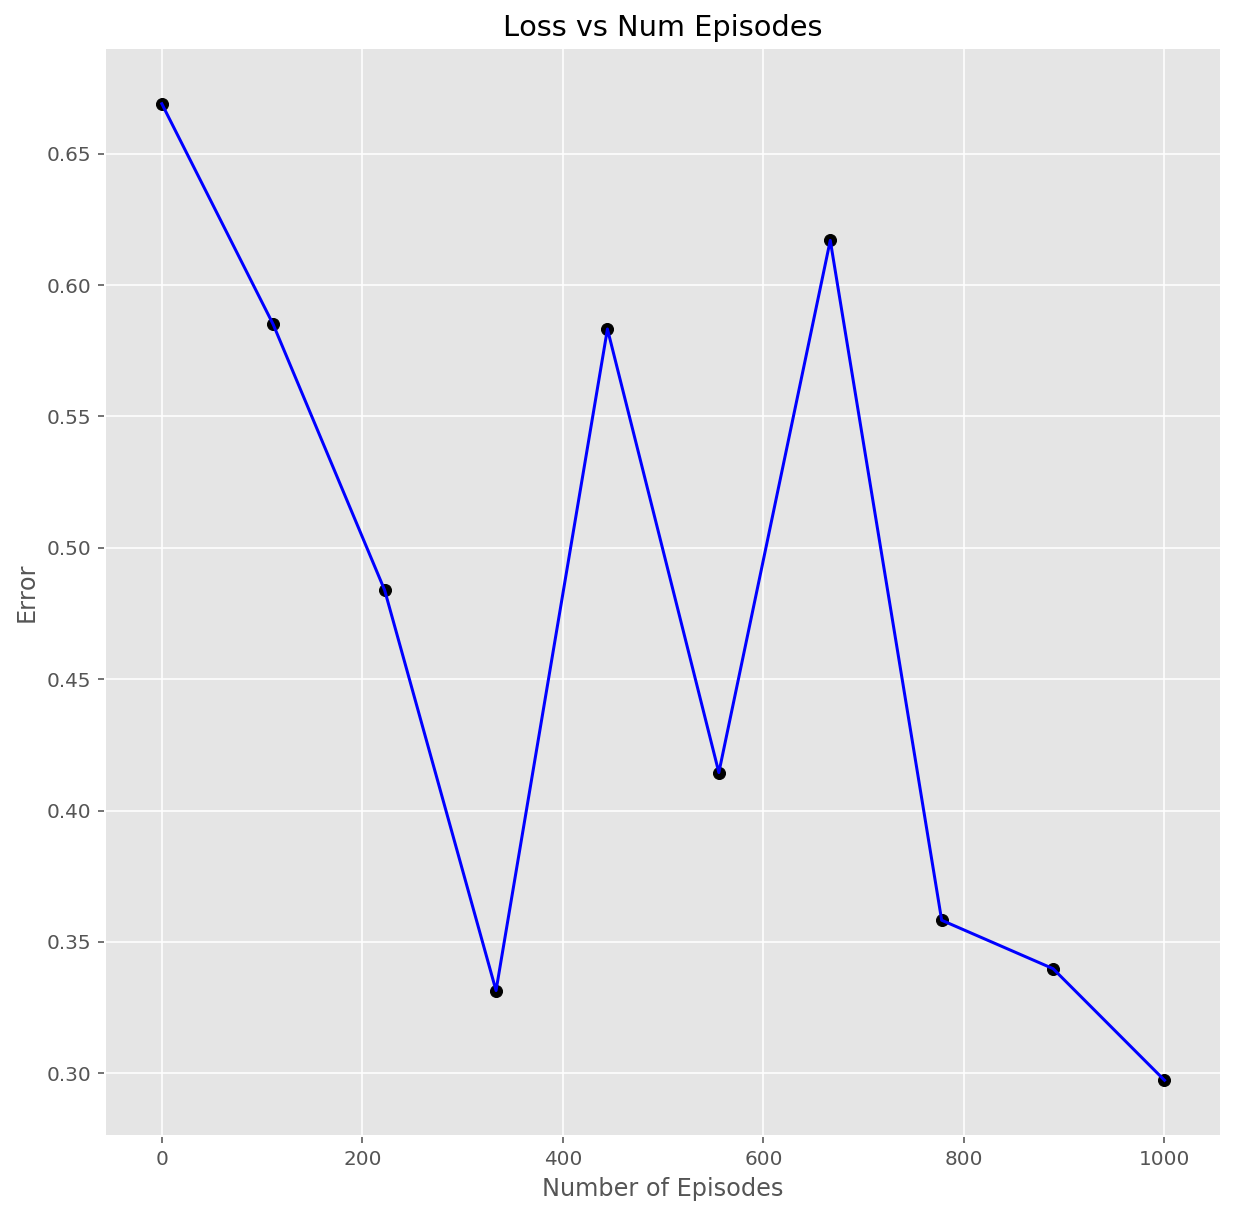

In [7]:
plt.figure(figsize=(10,10))
plt.title("Loss vs Num Episodes")
plt.plot(num_episodes,error,c='b')
plt.scatter(num_episodes,error,c='k')
plt.xlabel("Number of Episodes")
plt.ylabel("Error")
plt.show()

In [8]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

In [9]:
predsprobs = model(images)
preds = torch.argmax(predsprobs,dim=1)
preds = preds.numpy()

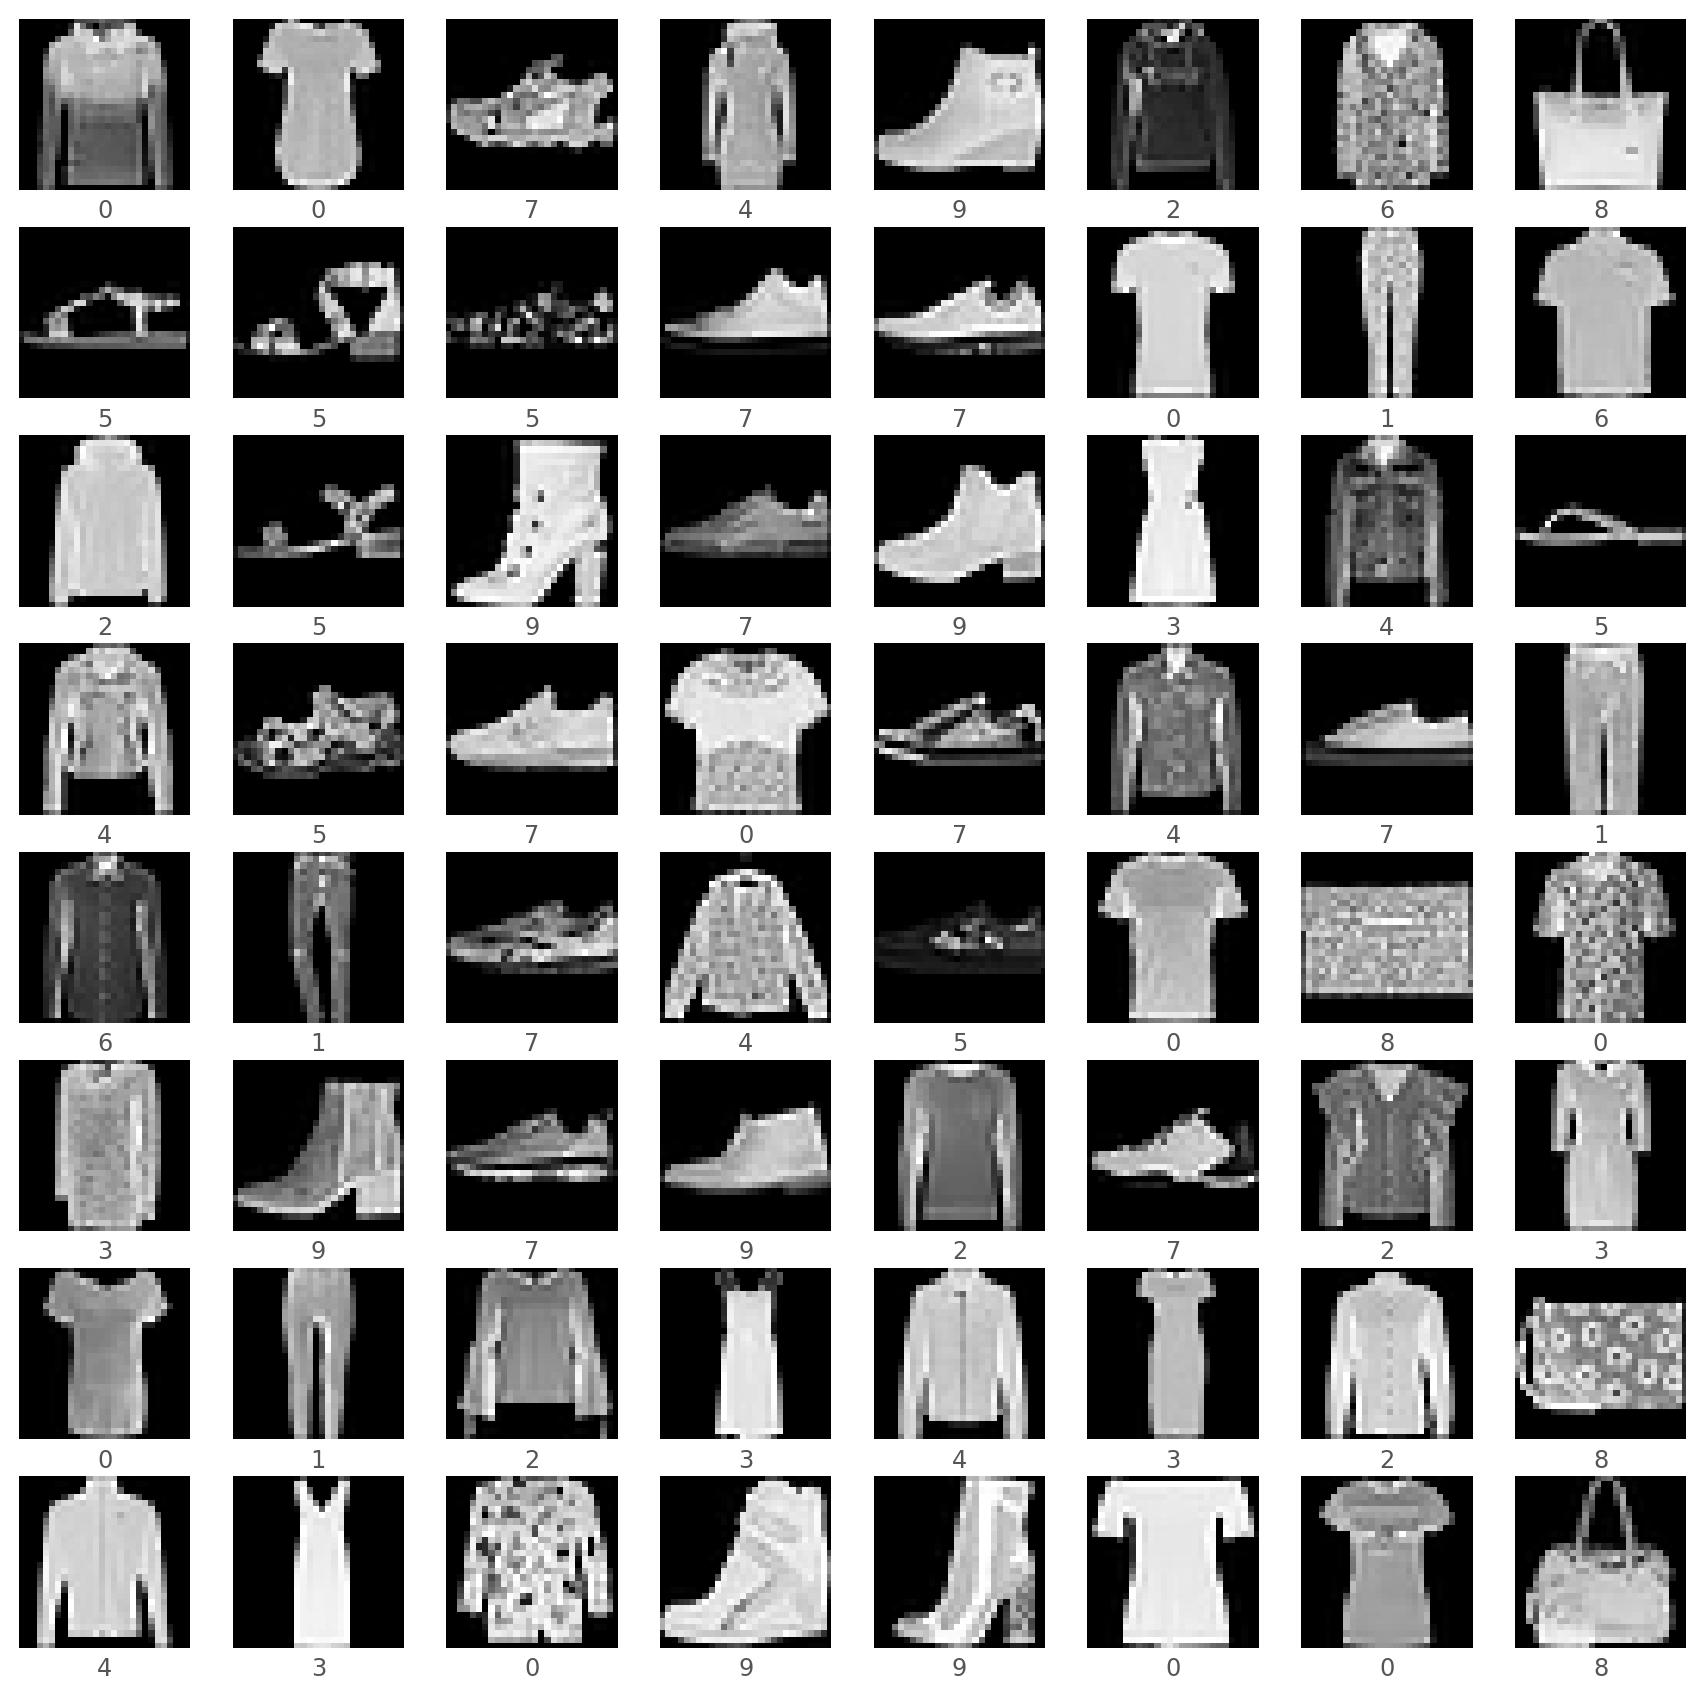

In [10]:
figure = plt.figure(figsize=(15,15))
for i in range(images.shape[0]):
    plt.subplot(8,8,i+1)
    plt.imshow(images[i].reshape(28,28),cmap='gray',interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(preds[i])
plt.show()

In [11]:
images, labels = next(iter(testloader))
images = images.view(images.shape[0],-1)
ps = torch.exp(model(images))
ps.shape

torch.Size([64, 10])

In [12]:
top_p, top_class = ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[0],
        [8],
        [3],
        [0],
        [4],
        [2],
        [8],
        [6],
        [3],
        [7]])


In [13]:
equals = top_class==labels.view(*top_class.shape)

In [14]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy: {accuracy.item()*100}%")

Accuracy: 92.1875%


In [15]:
epochs = 1000
running_loss = 0
train_losses, test_losses = [], []
for i in range(1,epochs+1):
    
    optimizer.zero_grad()
    
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0],-1)
    
    output = model(images)
    train_loss = criterion(output, labels)
    train_loss.backward()
    optimizer.step()
    
    running_loss += train_loss.item()
#     if i%100==0:
#         error.append(loss.item())
#         if i%1000==0:
#             print("After {} episode, Loss: {}".format(i,loss.item()))
#             print("===============================================")
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        model.eval()
        images, labels = next(iter(testloader))
        images = images.reshape(images.shape[0],-1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1,dim=1)
        equals = top_class==labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        #print(f"Accuracy: {accuracy.item()*100}%")
    model.train()
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print("Epoch {}/{}.. ".format(i,epochs),
         "Training Loss: {:.3f}.. ".format(train_loss),
         "Test Loss: {:.3f}.. ".format(test_loss),
         "Test Accuracy: {:.3f}".format(accuracy*100))

Epoch 1/1000..  Training Loss: 0.762..  Test Loss: 0.444..  Test Accuracy: 81.250
Epoch 2/1000..  Training Loss: 0.451..  Test Loss: 0.639..  Test Accuracy: 81.250
Epoch 3/1000..  Training Loss: 0.380..  Test Loss: 0.438..  Test Accuracy: 84.375
Epoch 4/1000..  Training Loss: 0.565..  Test Loss: 0.811..  Test Accuracy: 81.250
Epoch 5/1000..  Training Loss: 0.473..  Test Loss: 0.519..  Test Accuracy: 79.688
Epoch 6/1000..  Training Loss: 0.330..  Test Loss: 0.403..  Test Accuracy: 85.938
Epoch 7/1000..  Training Loss: 0.430..  Test Loss: 0.362..  Test Accuracy: 85.938
Epoch 8/1000..  Training Loss: 0.493..  Test Loss: 0.339..  Test Accuracy: 89.062
Epoch 9/1000..  Training Loss: 0.626..  Test Loss: 0.316..  Test Accuracy: 89.062
Epoch 10/1000..  Training Loss: 0.354..  Test Loss: 0.654..  Test Accuracy: 73.438
Epoch 11/1000..  Training Loss: 0.479..  Test Loss: 0.455..  Test Accuracy: 84.375
Epoch 12/1000..  Training Loss: 0.383..  Test Loss: 0.386..  Test Accuracy: 89.062
Epoch 13/1000

Epoch 102/1000..  Training Loss: 0.396..  Test Loss: 0.428..  Test Accuracy: 87.500
Epoch 103/1000..  Training Loss: 0.778..  Test Loss: 0.415..  Test Accuracy: 85.938
Epoch 104/1000..  Training Loss: 0.364..  Test Loss: 0.493..  Test Accuracy: 79.688
Epoch 105/1000..  Training Loss: 0.557..  Test Loss: 0.580..  Test Accuracy: 78.125
Epoch 106/1000..  Training Loss: 0.389..  Test Loss: 0.624..  Test Accuracy: 79.688
Epoch 107/1000..  Training Loss: 0.379..  Test Loss: 0.233..  Test Accuracy: 90.625
Epoch 108/1000..  Training Loss: 0.639..  Test Loss: 0.408..  Test Accuracy: 90.625
Epoch 109/1000..  Training Loss: 0.210..  Test Loss: 0.573..  Test Accuracy: 81.250
Epoch 110/1000..  Training Loss: 0.340..  Test Loss: 0.650..  Test Accuracy: 78.125
Epoch 111/1000..  Training Loss: 0.469..  Test Loss: 0.569..  Test Accuracy: 79.688
Epoch 112/1000..  Training Loss: 0.546..  Test Loss: 0.478..  Test Accuracy: 84.375
Epoch 113/1000..  Training Loss: 0.712..  Test Loss: 0.482..  Test Accuracy:

Epoch 200/1000..  Training Loss: 0.309..  Test Loss: 0.430..  Test Accuracy: 82.812
Epoch 201/1000..  Training Loss: 0.326..  Test Loss: 0.399..  Test Accuracy: 84.375
Epoch 202/1000..  Training Loss: 0.422..  Test Loss: 0.457..  Test Accuracy: 84.375
Epoch 203/1000..  Training Loss: 0.403..  Test Loss: 0.364..  Test Accuracy: 85.938
Epoch 204/1000..  Training Loss: 0.475..  Test Loss: 0.441..  Test Accuracy: 79.688
Epoch 205/1000..  Training Loss: 0.335..  Test Loss: 0.487..  Test Accuracy: 76.562
Epoch 206/1000..  Training Loss: 0.376..  Test Loss: 0.719..  Test Accuracy: 78.125
Epoch 207/1000..  Training Loss: 0.366..  Test Loss: 0.554..  Test Accuracy: 79.688
Epoch 208/1000..  Training Loss: 0.451..  Test Loss: 0.450..  Test Accuracy: 85.938
Epoch 209/1000..  Training Loss: 0.455..  Test Loss: 0.467..  Test Accuracy: 81.250
Epoch 210/1000..  Training Loss: 0.551..  Test Loss: 0.237..  Test Accuracy: 90.625
Epoch 211/1000..  Training Loss: 0.443..  Test Loss: 0.425..  Test Accuracy:

Epoch 299/1000..  Training Loss: 0.571..  Test Loss: 0.445..  Test Accuracy: 82.812
Epoch 300/1000..  Training Loss: 0.714..  Test Loss: 0.472..  Test Accuracy: 84.375
Epoch 301/1000..  Training Loss: 0.488..  Test Loss: 0.357..  Test Accuracy: 84.375
Epoch 302/1000..  Training Loss: 0.331..  Test Loss: 0.416..  Test Accuracy: 84.375
Epoch 303/1000..  Training Loss: 0.290..  Test Loss: 0.303..  Test Accuracy: 92.188
Epoch 304/1000..  Training Loss: 0.430..  Test Loss: 0.295..  Test Accuracy: 92.188
Epoch 305/1000..  Training Loss: 0.708..  Test Loss: 0.342..  Test Accuracy: 87.500
Epoch 306/1000..  Training Loss: 0.458..  Test Loss: 0.554..  Test Accuracy: 79.688
Epoch 307/1000..  Training Loss: 0.434..  Test Loss: 0.646..  Test Accuracy: 75.000
Epoch 308/1000..  Training Loss: 0.372..  Test Loss: 0.437..  Test Accuracy: 84.375
Epoch 309/1000..  Training Loss: 0.379..  Test Loss: 0.479..  Test Accuracy: 82.812
Epoch 310/1000..  Training Loss: 0.367..  Test Loss: 0.371..  Test Accuracy:

Epoch 400/1000..  Training Loss: 0.625..  Test Loss: 0.571..  Test Accuracy: 79.688
Epoch 401/1000..  Training Loss: 0.589..  Test Loss: 0.587..  Test Accuracy: 81.250
Epoch 402/1000..  Training Loss: 0.432..  Test Loss: 0.429..  Test Accuracy: 81.250
Epoch 403/1000..  Training Loss: 0.368..  Test Loss: 0.584..  Test Accuracy: 76.562
Epoch 404/1000..  Training Loss: 0.478..  Test Loss: 0.566..  Test Accuracy: 82.812
Epoch 405/1000..  Training Loss: 0.444..  Test Loss: 0.238..  Test Accuracy: 90.625
Epoch 406/1000..  Training Loss: 0.560..  Test Loss: 0.511..  Test Accuracy: 84.375
Epoch 407/1000..  Training Loss: 0.441..  Test Loss: 0.384..  Test Accuracy: 89.062
Epoch 408/1000..  Training Loss: 0.551..  Test Loss: 0.662..  Test Accuracy: 76.562
Epoch 409/1000..  Training Loss: 0.469..  Test Loss: 0.373..  Test Accuracy: 90.625
Epoch 410/1000..  Training Loss: 0.559..  Test Loss: 0.568..  Test Accuracy: 79.688
Epoch 411/1000..  Training Loss: 0.249..  Test Loss: 0.361..  Test Accuracy:

Epoch 500/1000..  Training Loss: 0.613..  Test Loss: 0.464..  Test Accuracy: 84.375
Epoch 501/1000..  Training Loss: 0.298..  Test Loss: 0.358..  Test Accuracy: 85.938
Epoch 502/1000..  Training Loss: 0.653..  Test Loss: 0.365..  Test Accuracy: 87.500
Epoch 503/1000..  Training Loss: 0.461..  Test Loss: 0.401..  Test Accuracy: 82.812
Epoch 504/1000..  Training Loss: 0.494..  Test Loss: 0.446..  Test Accuracy: 78.125
Epoch 505/1000..  Training Loss: 0.526..  Test Loss: 0.475..  Test Accuracy: 89.062
Epoch 506/1000..  Training Loss: 0.521..  Test Loss: 0.440..  Test Accuracy: 84.375
Epoch 507/1000..  Training Loss: 0.553..  Test Loss: 0.390..  Test Accuracy: 82.812
Epoch 508/1000..  Training Loss: 0.400..  Test Loss: 0.458..  Test Accuracy: 84.375
Epoch 509/1000..  Training Loss: 0.367..  Test Loss: 0.512..  Test Accuracy: 89.062
Epoch 510/1000..  Training Loss: 0.845..  Test Loss: 0.307..  Test Accuracy: 89.062
Epoch 511/1000..  Training Loss: 0.637..  Test Loss: 0.454..  Test Accuracy:

Epoch 601/1000..  Training Loss: 0.388..  Test Loss: 0.505..  Test Accuracy: 78.125
Epoch 602/1000..  Training Loss: 0.643..  Test Loss: 0.410..  Test Accuracy: 81.250
Epoch 603/1000..  Training Loss: 0.595..  Test Loss: 0.445..  Test Accuracy: 79.688
Epoch 604/1000..  Training Loss: 0.395..  Test Loss: 0.564..  Test Accuracy: 81.250
Epoch 605/1000..  Training Loss: 0.348..  Test Loss: 0.410..  Test Accuracy: 89.062
Epoch 606/1000..  Training Loss: 0.601..  Test Loss: 0.655..  Test Accuracy: 78.125
Epoch 607/1000..  Training Loss: 0.404..  Test Loss: 0.441..  Test Accuracy: 87.500
Epoch 608/1000..  Training Loss: 0.427..  Test Loss: 0.508..  Test Accuracy: 82.812
Epoch 609/1000..  Training Loss: 0.499..  Test Loss: 0.471..  Test Accuracy: 84.375
Epoch 610/1000..  Training Loss: 0.415..  Test Loss: 0.409..  Test Accuracy: 85.938
Epoch 611/1000..  Training Loss: 0.730..  Test Loss: 0.523..  Test Accuracy: 82.812
Epoch 612/1000..  Training Loss: 0.338..  Test Loss: 0.490..  Test Accuracy:

Epoch 699/1000..  Training Loss: 0.649..  Test Loss: 0.430..  Test Accuracy: 85.938
Epoch 700/1000..  Training Loss: 0.374..  Test Loss: 0.395..  Test Accuracy: 85.938
Epoch 701/1000..  Training Loss: 0.714..  Test Loss: 0.214..  Test Accuracy: 93.750
Epoch 702/1000..  Training Loss: 0.319..  Test Loss: 0.431..  Test Accuracy: 87.500
Epoch 703/1000..  Training Loss: 0.529..  Test Loss: 0.415..  Test Accuracy: 90.625
Epoch 704/1000..  Training Loss: 0.451..  Test Loss: 0.409..  Test Accuracy: 79.688
Epoch 705/1000..  Training Loss: 0.484..  Test Loss: 0.603..  Test Accuracy: 75.000
Epoch 706/1000..  Training Loss: 0.365..  Test Loss: 0.539..  Test Accuracy: 78.125
Epoch 707/1000..  Training Loss: 0.626..  Test Loss: 0.321..  Test Accuracy: 90.625
Epoch 708/1000..  Training Loss: 0.553..  Test Loss: 0.533..  Test Accuracy: 76.562
Epoch 709/1000..  Training Loss: 0.488..  Test Loss: 0.617..  Test Accuracy: 82.812
Epoch 710/1000..  Training Loss: 0.261..  Test Loss: 0.386..  Test Accuracy:

Epoch 799/1000..  Training Loss: 0.470..  Test Loss: 0.623..  Test Accuracy: 76.562
Epoch 800/1000..  Training Loss: 0.460..  Test Loss: 0.432..  Test Accuracy: 87.500
Epoch 801/1000..  Training Loss: 0.339..  Test Loss: 0.273..  Test Accuracy: 89.062
Epoch 802/1000..  Training Loss: 0.478..  Test Loss: 0.326..  Test Accuracy: 89.062
Epoch 803/1000..  Training Loss: 0.434..  Test Loss: 0.374..  Test Accuracy: 84.375
Epoch 804/1000..  Training Loss: 0.408..  Test Loss: 0.560..  Test Accuracy: 81.250
Epoch 805/1000..  Training Loss: 0.483..  Test Loss: 0.521..  Test Accuracy: 81.250
Epoch 806/1000..  Training Loss: 0.487..  Test Loss: 0.315..  Test Accuracy: 87.500
Epoch 807/1000..  Training Loss: 0.554..  Test Loss: 0.618..  Test Accuracy: 76.562
Epoch 808/1000..  Training Loss: 0.385..  Test Loss: 0.218..  Test Accuracy: 93.750
Epoch 809/1000..  Training Loss: 0.432..  Test Loss: 0.443..  Test Accuracy: 87.500
Epoch 810/1000..  Training Loss: 0.429..  Test Loss: 0.461..  Test Accuracy:

Epoch 899/1000..  Training Loss: 0.489..  Test Loss: 0.254..  Test Accuracy: 90.625
Epoch 900/1000..  Training Loss: 0.387..  Test Loss: 0.499..  Test Accuracy: 84.375
Epoch 901/1000..  Training Loss: 0.336..  Test Loss: 0.304..  Test Accuracy: 84.375
Epoch 902/1000..  Training Loss: 0.303..  Test Loss: 0.446..  Test Accuracy: 85.938
Epoch 903/1000..  Training Loss: 0.324..  Test Loss: 0.801..  Test Accuracy: 73.438
Epoch 904/1000..  Training Loss: 0.451..  Test Loss: 0.497..  Test Accuracy: 79.688
Epoch 905/1000..  Training Loss: 0.316..  Test Loss: 0.366..  Test Accuracy: 85.938
Epoch 906/1000..  Training Loss: 0.499..  Test Loss: 0.298..  Test Accuracy: 89.062
Epoch 907/1000..  Training Loss: 0.298..  Test Loss: 0.398..  Test Accuracy: 82.812
Epoch 908/1000..  Training Loss: 0.454..  Test Loss: 0.344..  Test Accuracy: 87.500
Epoch 909/1000..  Training Loss: 0.391..  Test Loss: 0.243..  Test Accuracy: 92.188
Epoch 910/1000..  Training Loss: 0.717..  Test Loss: 0.630..  Test Accuracy:

Epoch 999/1000..  Training Loss: 0.375..  Test Loss: 0.436..  Test Accuracy: 85.938
Epoch 1000/1000..  Training Loss: 0.370..  Test Loss: 0.599..  Test Accuracy: 87.500


In [16]:
%config InlineBackend.figure_format = 'retina'

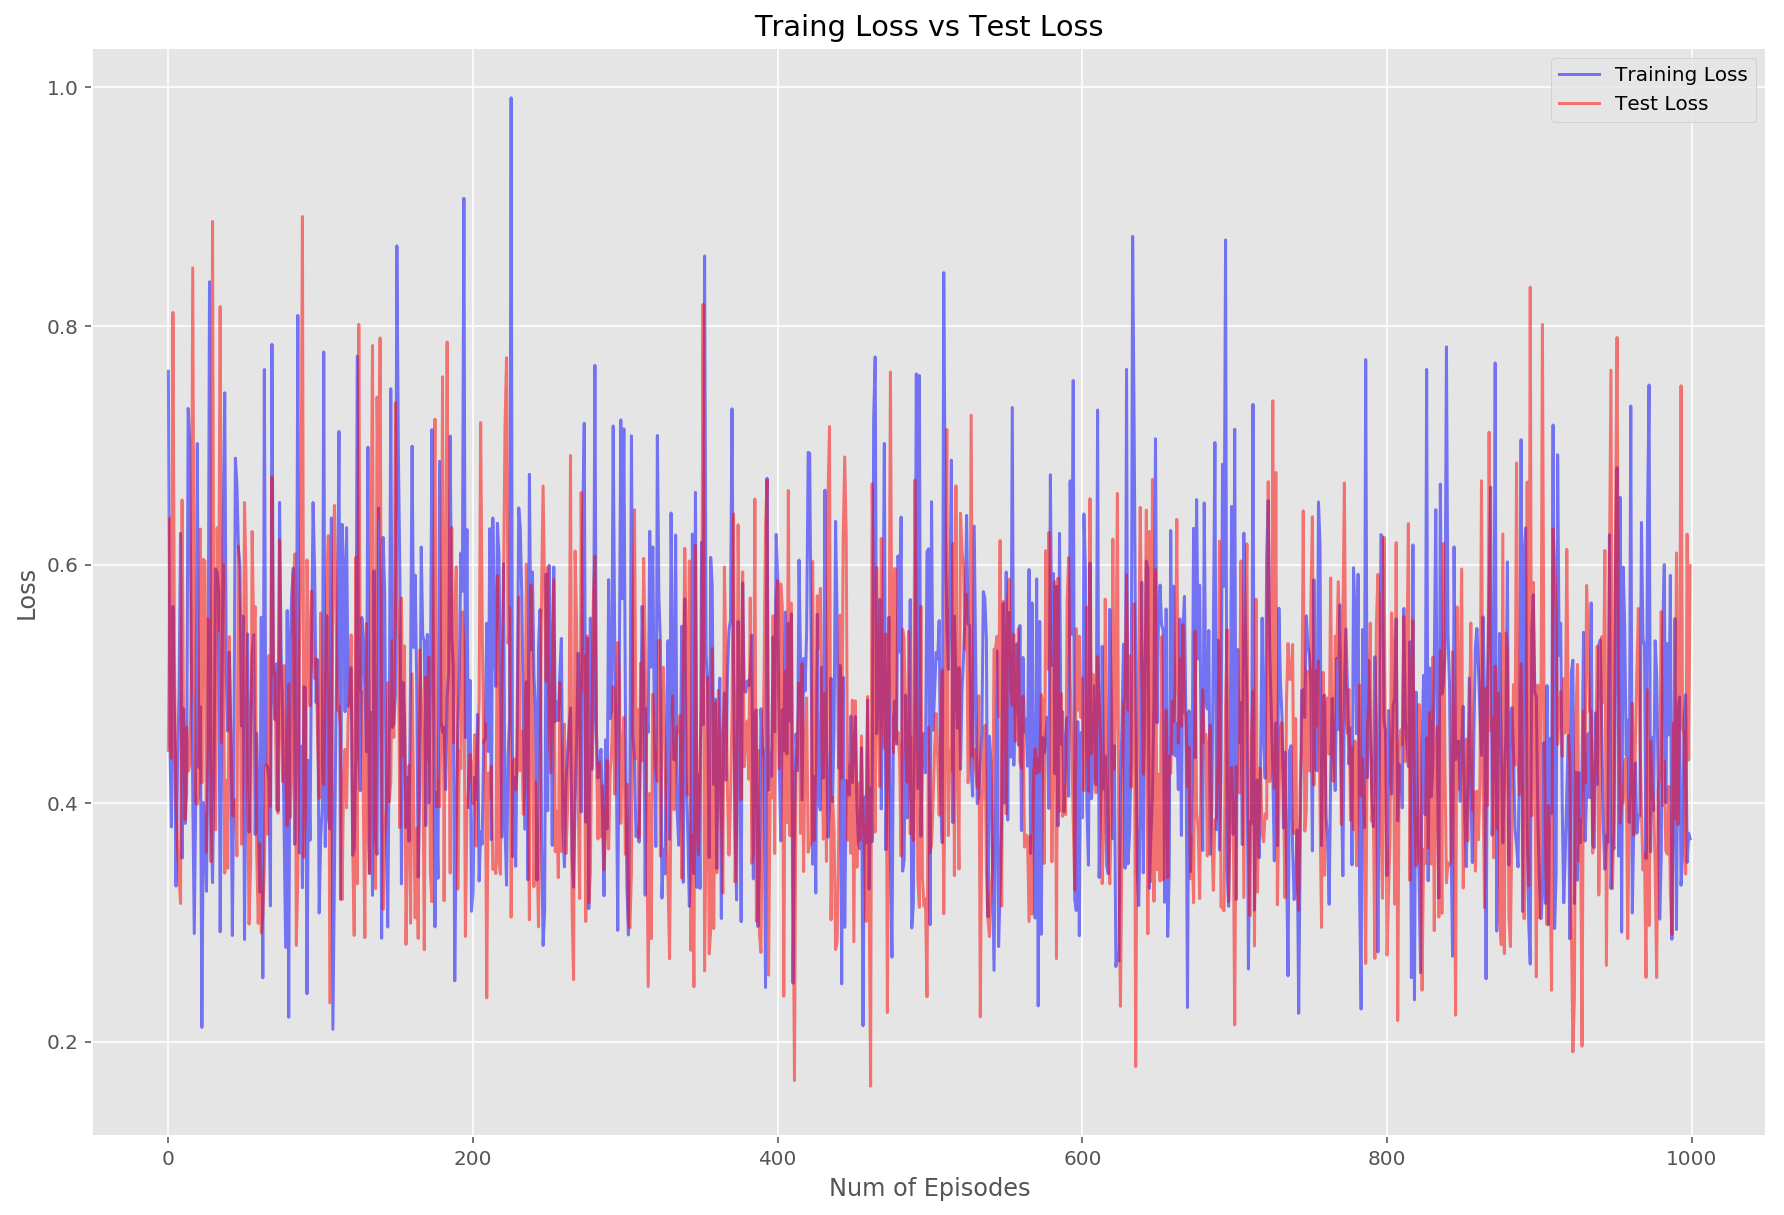

In [17]:
plt.figure(figsize=(15,10))
plt.plot(train_losses,label='Training Loss',c='b',alpha=.50)
plt.plot(test_losses,label='Test Loss',c='r',alpha=.50)
plt.title("Traing Loss vs Test Loss")
plt.xlabel("Num of Episodes")
plt.ylabel("Loss")
plt.legend()

### Saving and Loading Models

In [18]:
print("Model {}".format(model))
print("Model Keys {}".format(model.state_dict().keys()))

Model Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)
Model Keys odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [19]:
torch.save(model.state_dict(),'checkpoint.pth')

In [20]:
state_dict = torch.load('checkpoint.pth')

In [21]:
print(state_dict.keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [22]:
model.load_state_dict(state_dict)